In [2]:
from keras.models import load_model
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from scipy import misc
import math
from tqdm import tqdm
import os

/Users/mchrusci/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def show_source(i):
    plt.imshow(np.ones(X[i].shape) + X[i])

In [4]:
from src.gimp.draw.draw_triangle import draw_triangle as _draw_triangle
from src.gimp.draw.draw_line import draw_line as _draw_line
import os

def draw(y_, shape):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    os.system('python ../src/gimp/draw/draw_selection_shape.py --name {} --shape {} --size {} --r {} --g {} --b {} --a {} --x {} --y {} --w {} --h {} --rotation {}'\
              .format(name, shape, 100, y_[0], y_[1], y_[2], y_[3], y_[4], y_[5], y_[6], y_[7], y_[8]))
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_rectangle(y):
    draw(y, 'rectangle')
    
def draw_ellipse(y):
    draw(y, 'ellipse')
    
def draw_triangle(y):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_triangle(name, 100, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)
    
def draw_line(y):
    path_to_image_results = '../result/gimp_images/nn/shapes'
    name = 'jupyter_test.png'
    _draw_line(name, 100, y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8])
    image_data = plt.imread('%s/%s' % (path_to_image_results, name))[:,:,:3]
    plt.imshow(image_data)

In [5]:
model = load_model('../result/model/test/model.02-0.03.hdf5')

In [6]:
path = "../data/dataset/rectangle_small/"
name = "test"
X = np.load(path + "%s_X.npy" % name, mmap_mode="r")
Y = np.load(path + "%s_Y.npy" % name, mmap_mode="r")

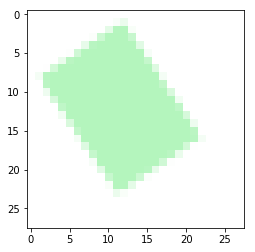

In [24]:
index = np.random.randint(0, X.shape[0])
show_source(index)

In [25]:
y = model.predict(X[index].reshape([1, 28, 28, 3]))
print(y)
# draw_rectangle(y[0])

[[0.31947023 0.92844784 0.26124987 0.56719047 0.10444695 0.1198686
  0.73700774 0.6338699  0.5586614 ]]
